# Import Necessary Modules

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Violin Plot Configuration

* DataFrame is generated from a CSV file that contains horisontal well targeting data.  This information can be exported from many of the geosteering software on the market.  Example provided includes data from six horizontal wells drilled in Unit X.  The width of each well's plot is relative to lateral length spent at that depth.  
 * Column A: Well Name ('Well' = string)
 * Column B: Vertical wellbore distance from defined surface datum depth (ft).  Each row is associated with measured depth from the directional survey.  The value indicates vertical distance above or below the datum surface.  Negative values suggest the well is above the datum surface while positive valuse suggest the well is below the datum surface ('FRM1' = integer)   
 * Column C: Approximate wellbore distance from one side of the unit line ('Dist' = integer)



* Typelog formation vertical distance from datum is defined.  This is how formation surfaces are depicted in violin plot

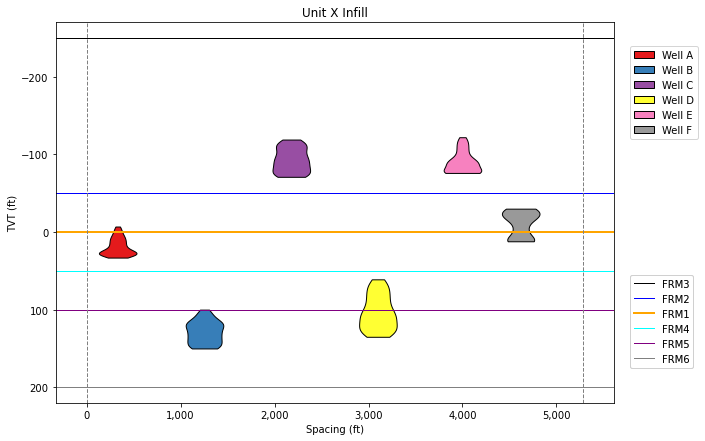

In [6]:
#Data Load 
df = pd.read_csv(r'Unit_X.csv')

#Subplot Configuration/Formatting 
fig, ax = plt.subplots(1, 1,figsize=(10,7))

wells = df['Well'].unique().tolist()
df_wells = pd.DataFrame(wells, columns=['Well'])
FRM1_values = list([np.array(value) for name,value in df.groupby('Well')['FRM1']])
dist_values = df.groupby('Well')['Dist'].agg("mean")
cmap = plt.get_cmap('Set1')
colors = [cmap(wells) for wells in np.linspace(0, 1,len(wells))]
label = pd.merge(dist_values, df_wells, on = ['Well'])

#Violin Plot and Attributes 
parts = ax.violinplot(FRM1_values, positions=dist_values, 
                      widths=400, showmeans=False, 
                      showmedians=False, showextrema=False)

for wells,pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[wells])
    pc.set_edgecolor('black') 
    pc.set_alpha(1)
    
#TypeLog Formation Distance/Thickness (feet) from Known Surface Datum
#Must Update thicknesses.  Negative values indicate distance above datum
FRM3 = -250
FRM2 = -50
FRM1 = 0   #Formation/Surface Datum
FRM4 = 50
FRM5 = 100
FRM6 = 200
      
#Axis Modifications
#Must Update Title
ax.set_title('Unit X Infill')
ax.set_xlabel('Spacing (ft)')
ax.set_xlim(left=-330,right=5610)
ax.set_ylabel('TVT (ft)')
ax.set_ylim(bottom=(FRM3 - 20), top=(FRM6 + 20))
ax.invert_yaxis()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
legend1 = ax.legend(label['Well'], bbox_to_anchor=(1.02, 0.95), loc = 'upper left')

#Major Surfaces from TypeLog.  Shall be modified as needed
plt.axhline(y = FRM3, color = 'black', lw = 1, label=str('FRM3'))
plt.axhline(y = FRM2, color = 'blue', lw = 1, label=str('FRM2'))
plt.axhline(y = FRM1, color = 'orange', lw = 2, label=str('FRM1'))
plt.axhline(y = FRM4, color = 'cyan', lw = 1, label=str('FRM4'))
plt.axhline(y = FRM5, color = 'purple', lw = 1, label=str('FRM5'))
plt.axhline(y = FRM6, color = 'grey', lw = 1, label=str('FRM6'))

legend2 = plt.legend(bbox_to_anchor=(1.02, 0.35), loc='upper left')

#Section/Unit Lines
plt.axvline(x = 0, ls = '--', color = 'grey', lw = 1)
plt.axvline(x = 5280, ls = '--', color = 'grey', lw = 1)

#Plot Legends
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.show()